# Wikipedia Toxicity

**DESCRIPTION**  
Using NLP and machine learning, make a model to identify toxic comments from the Talk edit pages on Wikipedia. Help identify the words that make a comment toxic.

**Problem Statement:** 
Wikipedia is the world’s largest and most popular reference work on the internet with about 500 million unique visitors per month. It also has millions of contributors who can make edits to pages. The Talk edit pages, the key community interaction forum where the contributing community interacts or discusses or debates about the changes pertaining to a particular topic. 
Wikipedia continuously strives to help online discussion become more productive and respectful. You are a data scientist at Wikipedia who will help Wikipedia to build a predictive model that identifies toxic comments in the discussion and marks them for cleanup by using NLP and machine learning. Post that, help identify the top terms from the toxic comments. 

**Domain: Internet**
Analysis to be done: Build a text classification model using NLP and machine learning that detects toxic comments.

**Content:** 
id: identifier number of the comment
comment_text: the text in the comment
toxic: 0 (non-toxic) /1 (toxic)

**Steps to perform:**
Cleanup the text data, using TF-IDF convert to vector space representation, use Support Vector Machines to detect toxic comments. Finally, get the list of top 15 toxic terms from the comments identified by the model.


**Task 1**: Load the data using read_csv function from pandas package


In [1]:
##Load data set
import pandas as pd, numpy as np
Data_ori = pd.read_csv("Talk_edit_pages_data.csv")
Data_ori.head()

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0


In [2]:
Data_ori.describe()

,toxic
count,5000.000000
mean,0.087400
std,0.282449
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Task 2:** Get the comments into a list, for easy text cleanup and manipulation

In [3]:
## Converting into list
comments_list = Data_ori.comment_text.values
comments_list[1:2]

array(['"\r\n\r\nThis seems unbalanced.  whatever I have said about Mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency.  I\'m more than happy to reign myself in, if that\'s what you\'d like (ruth be told, I was just trying to get Mathsci to pay attention and stop being uncivil).  I would expect you to issue the same request to Mathsci.  \r\n\r\n If this is intentionally unbalanced (for whatever reason), please let me know, and I will voluntarily close this account and move on to other things.  I like wikipedia, and I have a lot to contribute in my own way, but there is no point contributing to the project if some editors have administrative leave to be aggressively rude.  I\'m a good editor, and I don\'t really deserve to have people riding my ass every time I try to do certain things.  I\'ll happily leave it in the hands of the drama-prone, if that\'s what you think is best.  Ludwigs2 "'],
      dtype=object)

**Task 3:Cleanup**
1.	Using regular expressions, remove IP addresses
2.	Using regular expressions, remove URLs
3.	Normalize the casing
4.	Tokenize using word_tokenize from NLTK
5.	Remove stop words
6.	Remove punctuation
7.	Define a function to perform all these steps, you’ll use this later on the actual test set


In [4]:
###Regular expresion
import re

In [5]:
###Remove Ip adress
No_IP=[re.sub('[\d+\.{3}]\d+',"",txt) for txt in comments_list]
No_IP[1:2]

['"\r\n\r\nThis seems unbalanced.  whatever I have said about Mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency.  I\'m more than happy to reign myself in, if that\'s what you\'d like (ruth be told, I was just trying to get Mathsci to pay attention and stop being uncivil).  I would expect you to issue the same request to Mathsci.  \r\n\r\n If this is intentionally unbalanced (for whatever reason), please let me know, and I will voluntarily close this account and move on to other things.  I like wikipedia, and I have a lot to contribute in my own way, but there is no point contributing to the project if some editors have administrative leave to be aggressively rude.  I\'m a good editor, and I don\'t really deserve to have people riding my ass every time I try to do certain things.  I\'ll happily leave it in the hands of the drama-prone, if that\'s what you think is best.  Ludwigs2 "']

In [6]:
##Normalize case
lower_case = [txt.lower() for txt in No_IP]
lower_case[1:2]

['"\r\n\r\nthis seems unbalanced.  whatever i have said about mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency.  i\'m more than happy to reign myself in, if that\'s what you\'d like (ruth be told, i was just trying to get mathsci to pay attention and stop being uncivil).  i would expect you to issue the same request to mathsci.  \r\n\r\n if this is intentionally unbalanced (for whatever reason), please let me know, and i will voluntarily close this account and move on to other things.  i like wikipedia, and i have a lot to contribute in my own way, but there is no point contributing to the project if some editors have administrative leave to be aggressively rude.  i\'m a good editor, and i don\'t really deserve to have people riding my ass every time i try to do certain things.  i\'ll happily leave it in the hands of the drama-prone, if that\'s what you think is best.  ludwigs2 "']

In [7]:
###Remove URL
NO_URL = [re.sub("\w+://\S+","", txt) for txt in lower_case]
NO_URL[1:2]

['"\r\n\r\nthis seems unbalanced.  whatever i have said about mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency.  i\'m more than happy to reign myself in, if that\'s what you\'d like (ruth be told, i was just trying to get mathsci to pay attention and stop being uncivil).  i would expect you to issue the same request to mathsci.  \r\n\r\n if this is intentionally unbalanced (for whatever reason), please let me know, and i will voluntarily close this account and move on to other things.  i like wikipedia, and i have a lot to contribute in my own way, but there is no point contributing to the project if some editors have administrative leave to be aggressively rude.  i\'m a good editor, and i don\'t really deserve to have people riding my ass every time i try to do certain things.  i\'ll happily leave it in the hands of the drama-prone, if that\'s what you think is best.  ludwigs2 "']

In [8]:
##Tokenize
from nltk.tokenize import word_tokenize
word_tokens = [word_tokenize(sent) for sent in NO_URL]
print(word_tokens[0])

['``', 'a', 'barnstar', 'for', 'you', '!', 'the', 'defender', 'of', 'the', 'wiki', 'barnstar', 'i', 'like', 'your', 'edit', 'on', 'the', 'kayastha', 'page', '.', 'lets', 'form', 'a', 'solidarity', 'group', 'against', 'those', 'who', 'malign', 'the', 'article', 'and', 'its', 'subject', 'matter', '.', 'i', 'propose', 'the', 'folloing', 'name', 'for', 'the', 'group', '.', 'united', 'intellectuals', "'", 'front', 'of', 'kayastha', 'ethinicty', 'against', 'racist', 'or', 'castist', 'abuse', '(', 'uifkearca', ')', '``']


In [9]:
## Import stopwords
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [10]:
## Punctuations
from string import punctuation
stop_punct = list(punctuation)

**Task 4:** Using a counter, find the top terms in the data. 
   1. Can any of these be considered contextual stop words? 
   2.	Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
   3.	If yes, drop these from the data


In [11]:
###Contexual stop words
contextual_stopwords = ["article", "page", "wikipedia", "talk", "articles", "pages"]

In [12]:
##Create stopwords formula
stopword_formula = stop_nltk+stop_punct + contextual_stopwords + ["...", "``","''", "====", "must"]

In [13]:
##Remove Stopwords
def del_stop(sent):
    return [term for term in sent if term not in stopword_formula]
DATA_clean = [del_stop(sent) for sent in word_tokens]
print(DATA_clean[0])


['barnstar', 'defender', 'wiki', 'barnstar', 'like', 'edit', 'kayastha', 'lets', 'form', 'solidarity', 'group', 'malign', 'subject', 'matter', 'propose', 'folloing', 'name', 'group', 'united', 'intellectuals', 'front', 'kayastha', 'ethinicty', 'racist', 'castist', 'abuse', 'uifkearca']


In [14]:
## Top term in data using counter function
from collections import Counter  
#split_it =list(DATA_clean) 
term_list = []
for sent in DATA_clean:
    term_list.extend(sent)
Count = Counter(term_list) 
Count.most_common(20) 

[("'s", 1991),
 ("n't", 1795),
 ('please', 1039),
 ('would', 1007),
 ('ass', 986),
 ('fuck', 906),
 ('one', 861),
 ('like', 836),
 ('also', 657),
 ('see', 631),
 ('think', 630),
 ('know', 594),
 ('edit', 560),
 ('people', 553),
 ('use', 549),
 ("'m", 538),
 ('name', 536),
 ('may', 532),
 ('time', 482),
 ('thanks', 424)]

**Task 5:** Separate into train and test sets
   1.	Use train-test method to divide your data into 2 sets: train and test
   2.	Use a 70-30 split


In [15]:
# X variable of Linear regression formula
DATA_clean = [" ".join(sent) for sent in DATA_clean]
DATA_clean[:2]

['barnstar defender wiki barnstar like edit kayastha lets form solidarity group malign subject matter propose folloing name group united intellectuals front kayastha ethinicty racist castist abuse uifkearca',
 "seems unbalanced whatever said mathsci said far extreme unpleasant things mention others much greater frequency 'm happy reign 's 'd like ruth told trying get mathsci pay attention stop uncivil would expect issue request mathsci intentionally unbalanced whatever reason please let know voluntarily close account move things like lot contribute way point contributing project editors administrative leave aggressively rude 'm good editor n't really deserve people riding ass every time try certain things 'll happily leave hands drama-prone 's think best ludwigs2"]

In [16]:
# Y variable of Linear regression formula
Toxicity=Data_ori.toxic
Toxicity 

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: toxic, Length: 5000, dtype: int64

In [17]:
len(DATA_clean)

5000

In [18]:
###Split Train and Test set[70:30]
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(DATA_clean,Toxicity, test_size = 0.30)

In [19]:
len(X_train), len(X_test),Y_train.shape,len(Y_test)


(3500, 1500, (3500,), 1500)

**Task 6:**	Use TF-IDF values for the terms as feature to get into a vector space model
   1.	Import TF-IDF vectorizer from sklearn
   2.	Instantiate with a maximum of 4000 terms in your vocabulary
   3.	Fit and apply on the train set
   4.	Apply on the test set


In [20]:
##TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 4000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape, X_test_vec.shape


((3500, 4000), (1500, 4000))

In [21]:
print(X_test_vec.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Task 7:** Model building: Support Vector Machine
  1.	Instantiate SVC from sklearn with a linear kernel
  2.	Fit on the train data
  3.	Make predictions for the train and the test set


In [22]:
?svm.SVC

Object `svm.SVC` not found.


In [23]:
## Linear Support Vector Classifier(SVC) model building
from sklearn import svm
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train_vec,Y_train)

SVC(kernel='linear')

In [24]:
#Train data prediction
Y_train_pred = classifier_linear.predict(X_train_vec)
Y_train_pred.shape

(3500,)

In [25]:
##Prediction on Test data
Y_test_pred = classifier_linear.predict(X_test_vec)
Y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

**Task 8:** Model evaluation: Accuracy, recall, and f1_score
  1.	Report the accuracy on the train set
  2.	Report the recall on the train set:decent, high, low?
  3.	Get the f1_score on the train set


In [26]:
##Evaluation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [27]:

print(accuracy_score(Y_train, Y_train_pred)*100)
print(confusion_matrix(Y_train, Y_train_pred))
print(classification_report(Y_train, Y_train_pred))

97.17142857142858
[[3179    1]
 [  98  222]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3180
           1       1.00      0.69      0.82       320

    accuracy                           0.97      3500
   macro avg       0.98      0.85      0.90      3500
weighted avg       0.97      0.97      0.97      3500



Need to adjust the class imbalance, as the model seems to focus on the 0s

In [28]:
#print(accuracy_score(Y_test, Y_test_pred)*100)
#print(confusion_matrix(Y_test, Y_test_pred))
#print(classification_report(Y_test, Y_test_pred))

**Task 9:** Looks like you need to adjust  the class imbalance, as the model seems to focus on the 0s
  1.	Adjust the appropriate parameter in the SVC module

**Task 10:** Train again with the adjustment and evaluate
  1.	Train the model on the train set
  2.	Evaluate the predictions on the validation set: accuracy, recall, f1_score


In [29]:
##Adjust class weight 
classifier_linear = svm.SVC(kernel='linear',class_weight="balanced")
classifier_linear.fit(X_train_vec,Y_train)

SVC(class_weight='balanced', kernel='linear')

In [30]:
##Prediction
Y_train_preds_adjusted = classifier_linear.predict(X_train_vec)
Y_train_preds_adjusted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
Y_test_pred_adjusted = classifier_linear.predict(X_test_vec)
Y_test_pred_adjusted

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
##RE-Evaluation
print(accuracy_score(Y_train, Y_train_preds_adjusted)*100)
print(classification_report(Y_train, Y_train_preds_adjusted))

98.5142857142857
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3180
           1       0.87      0.98      0.92       320

    accuracy                           0.99      3500
   macro avg       0.93      0.98      0.96      3500
weighted avg       0.99      0.99      0.99      3500



Improved balance in the model between toxic and non-toxic texts.

In [33]:
#print(accuracy_score(Y_test, Y_test_pred_adjusted)*100)
#print(classification_report(Y_test, Y_test_pred_adjusted))

**Task 11:** Hyperparameter tuning
 1.	Import GridSearch and StratifiedKFold (because of class imbalance)
 2.	Provide the parameter grid to choose for ‘C’
 3.	Use a balanced class weight while instantiating the Support Vector Classifier

**Task 12:** Find the parameters with the best recall in cross validation
  1.	Choose ‘recall’ as the metric for scoring
  2.	Choose stratified 5 fold cross validation scheme
  3.	Fit on the train set


In [34]:
##Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [35]:
# Create Random parameter grid 
param_grid = {
    'C': [.1, 1, 10,100, 1000,10000,100000]
}
param_grid

{'C': [0.1, 1, 10, 100, 1000, 10000, 100000]}

In [36]:
?GridSearchCV

In [37]:
# Grid search model
classifier_svm = svm.SVC(random_state=42, class_weight="balanced", kernel="linear")
Grid_search = GridSearchCV(estimator = classifier_svm, param_grid = param_grid, 
                          cv = StratifiedKFold(5), n_jobs = -1, verbose = 1, scoring = "recall" )
Grid_search.fit(X_train_vec, Y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000]},
             scoring='recall', verbose=1)

In [38]:
Grid_search.cv_results_

{'mean_fit_time': array([3.79785967, 1.84286427, 1.34856834, 1.38694487, 1.54124985,
        1.61040702, 1.85385795]),
 'std_fit_time': array([0.11837445, 0.13290338, 0.04545334, 0.04792185, 0.12725296,
        0.02389896, 0.21654027]),
 'mean_score_time': array([0.77971911, 0.31100826, 0.24664874, 0.23645396, 0.2308578 ,
        0.25644212, 0.26443634]),
 'std_score_time': array([0.10352468, 0.0503732 , 0.04523819, 0.03142972, 0.02036377,
        0.02620377, 0.02712474]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000, 10000, 100000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000},
  {'C': 10000},
  {'C': 100000}],
 'split0_test_score': array([0.484375, 0.546875, 0.453125, 0.578125, 0.578125, 0.578125,
        0.578125]),
 'split1_test_score': array([0.53125 , 0.484375, 0.453125, 0.5625  , 0.5625  , 0.5625  ,
        0.5625  ]),


**Task 13:** What are the best parameters?

**Task 14:** Predict and evaluate using the best estimator
  1.	Use best estimator from the grid search to make predictions on the test set
  2.	What is the recall on the test set for the toxic comments?
  3.	What is the f1_score?


In [39]:
##Best estimator for search
Grid_search.best_estimator_

SVC(C=1000, class_weight='balanced', kernel='linear', random_state=42)

In [40]:
##Predict using Best estimators for Test data
Y_test_pred_grid = Grid_search.best_estimator_.predict(X_test_vec)
print(accuracy_score(Y_test, Y_test_pred_grid)*100)
print(classification_report(Y_test, Y_test_pred_grid))

86.13333333333333
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1383
           1       0.31      0.63      0.42       117

    accuracy                           0.86      1500
   macro avg       0.64      0.76      0.67      1500
weighted avg       0.91      0.86      0.88      1500



**Task 15:** What are the most prominent terms in the toxic comments?
1.	Separate the comments from the test set that the model identified as toxic
2.	Make one large list of the terms
3.	Get the top 15 terms


In [41]:
##Most prominen terms in Toxics comments
Toxic_comments = pd.Series(X_test)[Y_test_pred_grid == 1].values
term_list2 = []
for comment in Toxic_comments:
    term_list2.extend(word_tokenize(comment))
    
term_list2

['penis',
 'write',
 '==',
 'sorry',
 'commenting',
 'blooming',
 'idiot',
 'gay',
 'leader',
 'yamla',
 'gay',
 'niggers',
 'saturn',
 'jupiter',
 'hailing',
 'name',
 'wide',
 'butt',
 'size',
 'city',
 'paris',
 "'ve",
 'gone',
 'ahead',
 'history',
 'merged',
 'disambiguation',
 'page',
 '.',
 'assuming',
 'insult',
 'term',
 'irish',
 'republican',
 'mind',
 'business',
 'persian',
 'asshole',
 'acanoobic',
 'noobenger',
 'concern',
 'u',
 'rondo',
 'would',
 'interesting',
 'tailed',
 'jews',
 'read',
 'khalili.pdf',
 'khalilli',
 'indeed',
 'tajik',
 'also',
 'great',
 'tajik',
 'nationalist',
 'hated',
 'aughan',
 'jews',
 'nazis',
 'jews',
 'thorn',
 'eyes',
 'pashtun',
 'dogs',
 'fascists-',
 'aughanmellatis-',
 'aughan',
 'nazis',
 'go',
 'fu',
 'ck',
 'de',
 'ad',
 'mum',
 'lick',
 'corpse',
 'dirty',
 'little',
 'w',
 'hore',
 'get',
 'life',
 'pathetic',
 'excuse',
 'human',
 'problems',
 'altenman',
 'looks',
 'like',
 'problems',
 'altenman',
 'want',
 'trade',
 'notes'

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


#Text=Text.split(", ")
#def unique_list(l):
   # ulist = []
   # [ulist.append(x) for x in l if x not in ulist]
    #return ulist

#Text=(unique_list(term_list2))
Text='  '.join(term_list2)
Text

"penis  write  ==  sorry  commenting  blooming  idiot  gay  leader  yamla  gay  niggers  saturn  jupiter  hailing  name  wide  butt  size  city  paris  've  gone  ahead  history  merged  disambiguation  page  .  assuming  insult  term  irish  republican  mind  business  persian  asshole  acanoobic  noobenger  concern  u  rondo  would  interesting  tailed  jews  read  khalili.pdf  khalilli  indeed  tajik  also  great  tajik  nationalist  hated  aughan  jews  nazis  jews  thorn  eyes  pashtun  dogs  fascists-  aughanmellatis-  aughan  nazis  go  fu  ck  de  ad  mum  lick  corpse  dirty  little  w  hore  get  life  pathetic  excuse  human  problems  altenman  looks  like  problems  altenman  want  trade  notes  'd  remove  u  nlgga  apparently  consensus  never  change  hah  propaganda  instigated  gentlemen  .  infact  powder  coating  contains  epoxy  hardeners  fillers  extenders  blend  powder  form  ambient  temperature  example  appropriate  however  murder  mentioned  opening  para

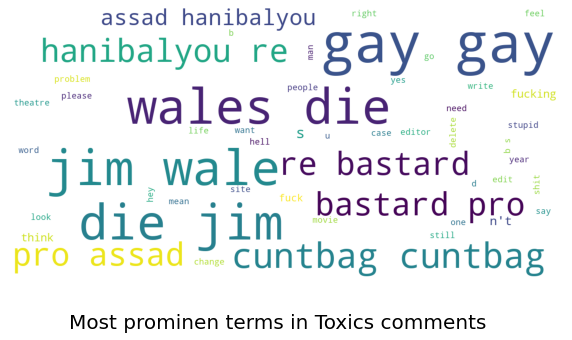

In [43]:
title = 'Most prominen terms in Toxics comments'
wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=50,
    max_font_size=40, 
    scale=3,
    random_state=1 
).generate(Text)
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud);

In [44]:
count2 = Counter(term_list2)
Top15_toxic_word=count2.most_common(15)
Top15_toxic_word

[('gay', 222),
 ('jim', 157),
 ('wales', 156),
 ('die', 156),
 ("'re", 126),
 ('cuntbag', 126),
 ('bastard', 110),
 ('pro-assad.hanibalyou', 106),
 ("'s", 33),
 ("n't", 29),
 ('fucking', 19),
 ('like', 17),
 ('think', 17),
 ('fuck', 15),
 ('..', 13)]